<center><h1><center>CSCI - 4146 - The Process of Data Science - Summer 2022</h1></center>
<h1><center>Project - Group 7</h1></center>
<h2><center>Superstore - Sales Analysis and Prediction</h2></center></center>


<br/>
<br/>

<b>Kartik Kakadiya</b>  
(ID: B00901642)


<b>Krishnateja Vemula</b>  
(ID: B00880866)  

# Initializations

Here are all the packages we used :

In [1]:
# Imports
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from scipy.stats import ks_2samp

import itertools
import statsmodels.api as sm
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Below are the packages that have been installed for the project,

In [2]:
!pip install mlxtend==0.17.0 --upgrade
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.4 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=ab535fd27f17cbf1ca44cd58ec1c783b4c8e1da209a169cfe12b6828eebc49ef
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


Below are the imports from the downloaded packages,

In [3]:
from apyori import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

## Configurations

For the objective of improving the outcomes we showed, we disregarded the warning (This has been done at the end of the project).

In [4]:
warnings.filterwarnings('ignore')

Set style for our plots as 'whitegrid'.

In [5]:
sns.set_style("whitegrid")

# Part 1 : Data Understanding and Preprocessing<a id='top'></a>



To begin processing, we first import our dataset,

In [6]:
# Loading dataset
DATASET_URL = "https://raw.githubusercontent.com/ktkakadiya/project_6409_group_7/main/dataset/superstore_dataset2011-2015.csv"
dataset = pd.read_csv(DATASET_URL, encoding='latin-1')

In [7]:
# Convert columns to dtypes
dataset = dataset.convert_dtypes()

Here, we disply information about each of the columns in our dataset so that you may better understand it.

In [8]:
# Print dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  Int64  
 1   Order ID        51290 non-null  string 
 2   Order Date      51290 non-null  string 
 3   Ship Date       51290 non-null  string 
 4   Ship Mode       51290 non-null  string 
 5   Customer ID     51290 non-null  string 
 6   Customer Name   51290 non-null  string 
 7   Segment         51290 non-null  string 
 8   City            51290 non-null  string 
 9   State           51290 non-null  string 
 10  Country         51290 non-null  string 
 11  Postal Code     9994 non-null   Int64  
 12  Market          51290 non-null  string 
 13  Region          51290 non-null  string 
 14  Product ID      51290 non-null  string 
 15  Category        51290 non-null  string 
 16  Sub-Category    51290 non-null  string 
 17  Product Name    51290 non-null 

To better understand our dataset, we also print some of the records.

In [9]:
dataset.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.0,29.64,8.17,High


## 1.1 : Data Quality Report

It's now time to create our data quality reports.

Building a Data Quality Report, consists of


*   Report for continuous features
*   Report for categorical features



### 1.1.1 : Continuous Features Report

Here, we are creating a report with continuous feautres that includes:

1. count
2. Missing values percentage
3. Cardinality(distinct values)
4. Min
5. 1st quartile
6. Mean
7. Median
8. 3rd quartile
9. Max
10. Standard deviation


In [10]:
# Function to build continuous feature report
def continuous_features_report(dataset):
    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    lst_cont_features = dataset.select_dtypes("number").columns
    dataset_continuous = dataset[lst_cont_features]

    report_df = pd.DataFrame(index=lst_cont_features, columns=stats.keys())
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(dataset_continuous)

    return report_df

In [11]:
continuous_features_report(dataset)

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Row ID,51290,0.00000,51290,1.000,12823.25,25645.500000,25645.500,38467.75,51290.000,14806.291990
Postal Code,51290,80.51472,631,1040.000,23223.0,55190.379428,56430.500,90008.0,99301.000,32063.693350
Sales,51290,0.00000,22995,0.444,30.758625,246.490581,85.053,251.0532,22638.480,487.565361
Quantity,51290,0.00000,14,1.000,2.0,3.476545,3.000,5.0,14.000,2.278766
Discount,51290,0.00000,27,0.000,0.0,0.142908,0.000,0.2,0.850,0.212280
Profit,51290,0.00000,24575,-6599.978,0.0,28.610982,9.240,36.81,8399.976,174.340972
Shipping Cost,51290,0.00000,10037,0.000,2.61,26.375915,7.790,24.45,933.570,57.296804


### 1.1.2 : Categorical Features Report

We are creating a report for the dataset's categorical features, which includes the following:

1. Count
2. Missing Percentage
3. Cardinality
4. Mode
5. Mode Frequency
6. Mode Precentage
7. 2nd Mode
8. 2nd Mode Frequency
9. 2nd Mode Precentage


In [12]:
# Function to build categorical features report
def categorical_features_report(dataset):
    def _mode(df):
        return df.apply(lambda ft: ft.mode().to_list()).T

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ft[~ft.isin(ft.mode())].mode().to_list())

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    lst_cate_features = dataset.select_dtypes(exclude="number").columns
    categorical_dataset = dataset[lst_cate_features]
    
    report_df = pd.DataFrame(index=lst_cate_features, columns=stats.keys())
    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(categorical_dataset)

    return report_df

In [13]:
categorical_features_report(dataset)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Order ID,51290,0.0,25035,CA-2014-100111,14,0.027296,"[IN-2012-41261, IN-2013-42311, MX-2014-166541,...",65,0.126730
Order Date,51290,0.0,1430,18-06-2014,135,0.263209,[18-11-2014],127,0.247612
Ship Date,51290,0.0,1464,22-11-2014,130,0.253461,[7/9/2014],115,0.224215
Ship Mode,51290,0.0,4,Standard Class,30775,60.001950,[Second Class],10309,20.099435
Customer ID,51290,0.0,1590,PO-18850,97,0.189121,[BE-11335],94,0.183272
Customer Name,51290,0.0,795,Muhammed Yedwab,108,0.210567,[Steven Ward],106,0.206668
Segment,51290,0.0,3,Consumer,26518,51.702086,[Corporate],15429,30.081887
City,51290,0.0,3636,New York City,915,1.783973,[Los Angeles],747,1.456424
State,51290,0.0,1094,California,2001,3.901345,[England],1499,2.922597
Country,51290,0.0,147,United States,9994,19.485280,[Australia],2837,5.531293


## 1.2 : Data Quality Issues and Plan

### 1.2.1 : Data Quality Issues

Before building a model, first, we need to check the quality of the dataset we have, to arrive at the most efficient conclusions.

Therefore, we employed the following techniques to identify the data quality issues in this case:
* Missing values identification
* Irregular cardinalities
* Detecting Outliers

#### 1.2.1.1 : Missing Values

To identify missing values for each features in our dataset, we developed a function. Using it, we can observe that the only features with missing values is "Postal Code".

In [14]:
# Detecting missing values
def get_missing_count(dataset):
    return dataset.isnull().sum()

print("Number of missing values :")
print(get_missing_count(dataset))

Number of missing values :
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


#### 1.2.1.2:  Irregular Cardinality

We examine the categorical feature report to see whether any features have irregular cardinality in order to identify them.

In [15]:
categorical_features_report(dataset)

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Order ID,51290,0.0,25035,CA-2014-100111,14,0.027296,"[IN-2012-41261, IN-2013-42311, MX-2014-166541,...",65,0.126730
Order Date,51290,0.0,1430,18-06-2014,135,0.263209,[18-11-2014],127,0.247612
Ship Date,51290,0.0,1464,22-11-2014,130,0.253461,[7/9/2014],115,0.224215
Ship Mode,51290,0.0,4,Standard Class,30775,60.001950,[Second Class],10309,20.099435
Customer ID,51290,0.0,1590,PO-18850,97,0.189121,[BE-11335],94,0.183272
Customer Name,51290,0.0,795,Muhammed Yedwab,108,0.210567,[Steven Ward],106,0.206668
Segment,51290,0.0,3,Consumer,26518,51.702086,[Corporate],15429,30.081887
City,51290,0.0,3636,New York City,915,1.783973,[Los Angeles],747,1.456424
State,51290,0.0,1094,California,2001,3.901345,[England],1499,2.922597
Country,51290,0.0,147,United States,9994,19.485280,[Australia],2837,5.531293


#### 1.2.1.3 Detecting outliers

For each continuous features in our dataset, we employ our constructed method to identify outliers. By using it, we can see that a lot of features have outliers.
* We use box plots to display outilers for each features.

In [16]:
# Function to get outlier count
def get_outliers_count(dataset, strFeature):
    Q1 = dataset[strFeature].quantile(0.25)
    Q3 = dataset[strFeature].quantile(0.75)
    IQR = Q3-Q1
    outliers_df = dataset[(dataset[strFeature] < (Q1 - 1.5 * IQR)) | (dataset[strFeature] > (Q3 + 1.5 * IQR))]
    return outliers_df, len(outliers_df)

The boxplot and number of outliers for the feature "Quantity" are shown below.

Number of outliers 877


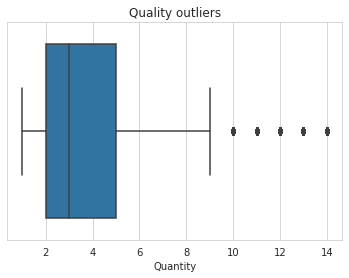

In [17]:
sns.boxplot(x="Quantity", data=dataset).set(title="Quality outliers")
con_outliers_df, con_outliers_count = get_outliers_count(dataset, "Quantity")
print("Number of outliers", con_outliers_count)

The boxplot and number of outliers for the feature "Discount" are shown below.

Number of outliers 4172


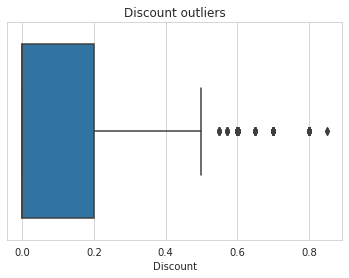

In [18]:
sns.boxplot(x="Discount", data=dataset).set(title="Discount outliers")
con_outliers_df, con_outliers_count = get_outliers_count(dataset, "Discount")
print("Number of outliers", con_outliers_count)

The boxplot and number of outliers for the feature "Shipping Cost" are shown below.

Number of outliers 5909


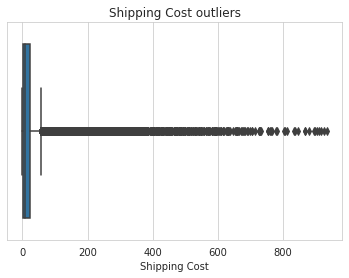

In [19]:
sns.boxplot(x="Shipping Cost", data=dataset).set(title="Shipping Cost outliers")
con_outliers_df, con_outliers_count = get_outliers_count(dataset, "Shipping Cost")
print("Number of outliers", con_outliers_count)

The boxplot and number of outliers for the feature "Profit" are shown below.

Number of outliers 9755


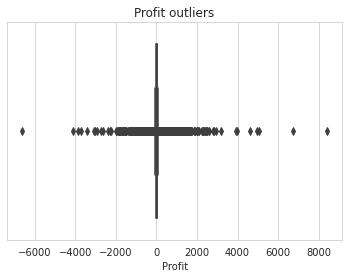

In [20]:
sns.boxplot(x="Profit", data=dataset).set(title="Profit outliers")
con_outliers_df, con_outliers_count = get_outliers_count(dataset, "Profit")
print("Number of outliers", con_outliers_count)

The boxplot and number of outliers for the feature "Sales" are shown below.

Number of outliers 5655


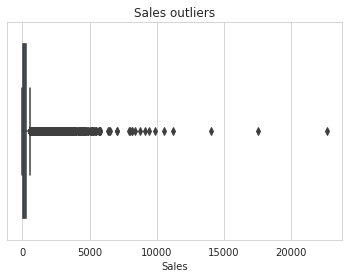

In [21]:
sns.boxplot(x="Sales", data=dataset).set(title="Sales outliers")
con_outliers_df, con_outliers_count = get_outliers_count(dataset, "Sales")
print("Number of outliers", con_outliers_count)

### 1.2.2 : Data Quality Plan



After building the above methods we have observed that 
* **Missing Values:** In the "Postal Code" feature of the dataset, there are a lot of missing values (around 80%). Because it won't be very useful in creating prediction models, we thus forecast that it would be preferable to remove this feature.

* **Irregular Cardinalities:** We found no irregular cardinalities according to the report we produced for the categorical features of the dataset.

*  **Detecting Outliers:** We can observe that many continuous features in this dataset include outliers. We won't be eliminating any outliers, though, because our dataset is considerably small. Additionally, we can infer from the aforementioned boxplots that these are just some large orders and not any noisy data.

## 1.3 : Execute Data Quality Plan

We just need to remove the "Postal Code" feature from the dataset in accordance with the data quality plan.

In [22]:
# Dropping customer id
dataset.drop('Postal Code', axis=1, inplace=True)

## 1.4 : Feature Visualization

In order to understand each features of our dataset better, we will now conduct several visualisations.

1. The histogram for the "Quantity" feature is shown below.

[Text(0.5, 1.0, 'Quality wise Count')]

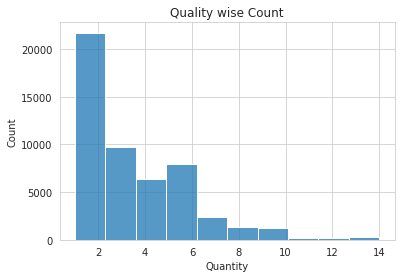

In [23]:
sns.histplot(data=dataset, x="Quantity", bins=10).set(title="Quality wise Count")

2. The histogram for the "Discount" feature is shown below.

[Text(0.5, 1.0, 'Discount wise Count')]

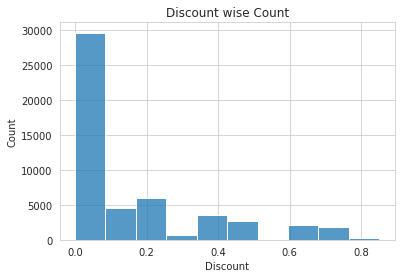

In [24]:
sns.histplot(data=dataset, x="Discount", bins=10).set(title="Discount wise Count")

3. The histogram for the "Shipping cost" feature is shown below.

[Text(0.5, 1.0, 'Shipping Cost wise Count')]

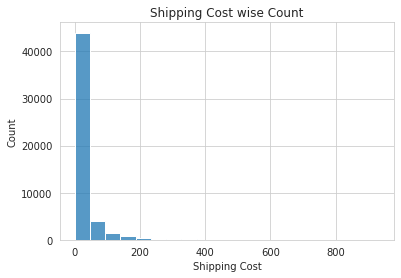

In [25]:
sns.histplot(data=dataset, x="Shipping Cost", bins=20).set(title="Shipping Cost wise Count")

4. The histogram for the "Profit" feature is shown below.

[Text(0.5, 1.0, 'Profit wise Count')]

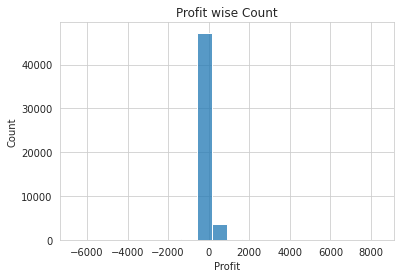

In [26]:
sns.histplot(data=dataset, x="Profit", bins=20).set(title="Profit wise Count")

5. The histogram for the "Sales" feature is shown below.

[Text(0.5, 1.0, 'Sales wise Count')]

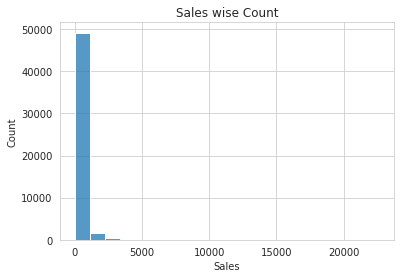

In [27]:
sns.histplot(data=dataset, x="Sales", bins=20).set(title="Sales wise Count")

6.  The barplot for the "Ship Mode" feature is shown below.

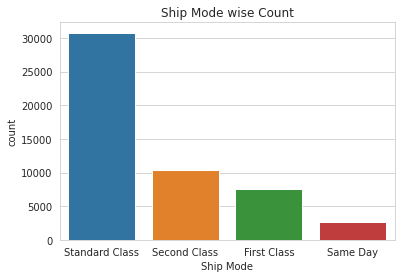

In [28]:
ax = sns.countplot(x="Ship Mode", data=dataset).set(title="Ship Mode wise Count")

7.  The barplot for the "Segment" feature is shown below.

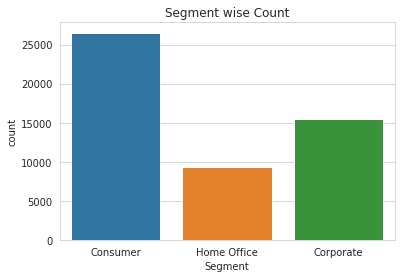

In [29]:
ax = sns.countplot(x="Segment", data=dataset).set(title="Segment wise Count")

8.  The barplot for the "Market" feature is shown below.

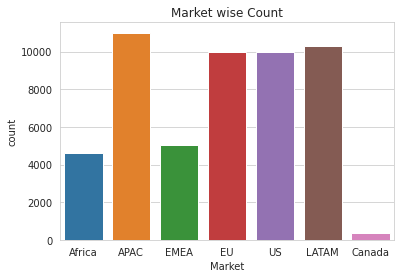

In [30]:
ax = sns.countplot(x="Market", data=dataset).set(title="Market wise Count")

9. The barplot for the "Region" feature is shown below.

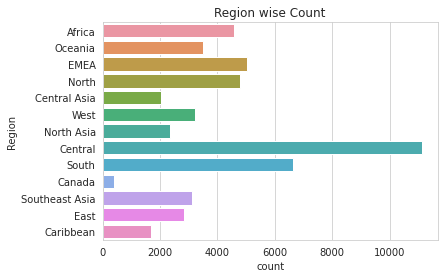

In [31]:
ax = sns.countplot(y="Region", data=dataset).set(title="Region wise Count")

10.  The barplot for the "Category" feature is shown below.

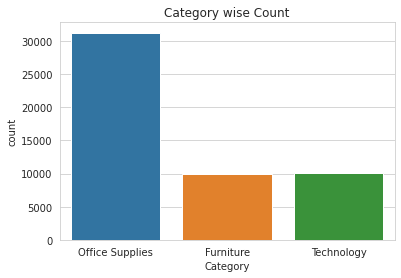

In [32]:
ax = sns.countplot(x="Category", data=dataset).set(title="Category wise Count")

11.  The barplot for the "Sub-Category" feature is shown below.

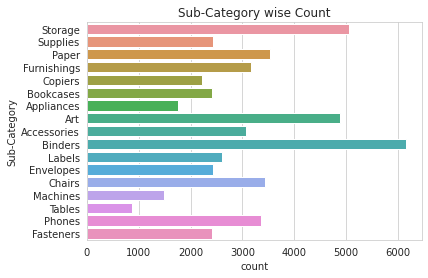

In [33]:
ax = sns.countplot(y="Sub-Category", data=dataset).set(title="Sub-Category wise Count")

12.  The barplot for the "Order Priority" feature is shown below.

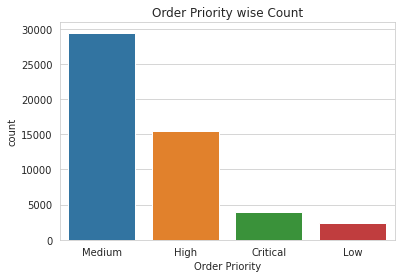

In [34]:
ax = sns.countplot(x="Order Priority", data=dataset).set(title="Order Priority wise Count")

## 1.5 Data Analysis

### 1.5.1 : Most Sold/Profitable Product

In this section, we'll discover which product sold the most and which made the most profit.

In [35]:
data_summary = dataset.groupby(['Product Name']).sum().reset_index()

The top 10 products with the highest sales are shown below.

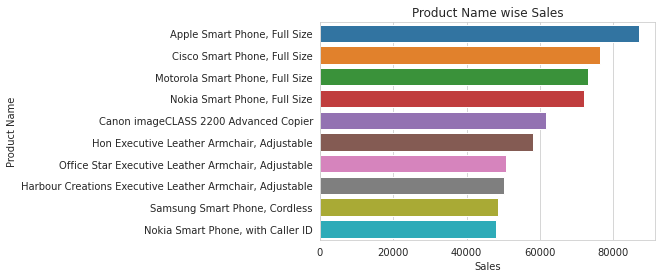

In [36]:
data_summary_temp = data_summary.sort_values('Sales', ascending=False).head(10)
ax = sns.barplot(y='Product Name', x='Sales', data=data_summary_temp).set(title="Product Name wise Sales")

The top 10 items with the highest profit are shown below.

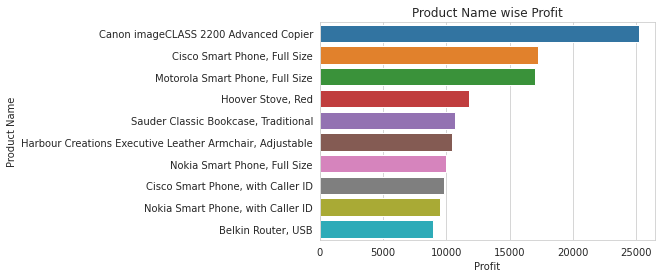

In [37]:
data_summary_temp = data_summary.sort_values('Profit', ascending=False).head(10)
ax = sns.barplot(y='Product Name', x='Profit', data=data_summary_temp).set(title="Product Name wise Profit")

### 1.5.2 : Most Sold/Profitable Category

In this section, we'll discover which product category sold the most and which made the most profit.

In [38]:
data_summary = dataset.groupby(['Category']).sum().reset_index()

Here we show all the product categories and the amount of sell it generated.

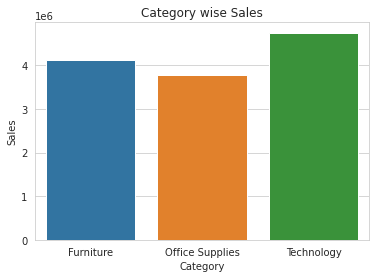

In [39]:
ax = sns.barplot(x='Category', y='Sales', data=data_summary).set(title="Category wise Sales")

Here we show all the product categories and the amount of profit it made.

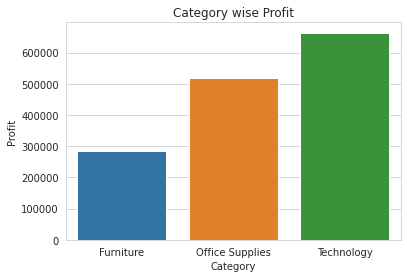

In [40]:
ax = sns.barplot(x='Category', y='Profit', data=data_summary).set(title="Category wise Profit")

### 1.5.3 : Most Sold/Profitable Sub-Category

In this section, we'll discover which product sub-category sold the most and which made the most profit.

In [41]:
data_summary = dataset.groupby(['Sub-Category']).sum().reset_index()

Here we show all the product sub-categories and the amount of sell it generated.

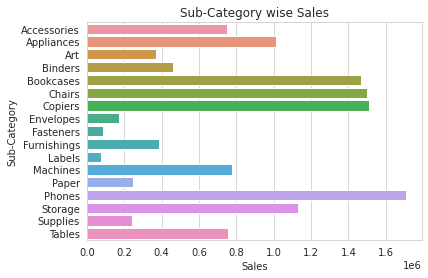

In [42]:
ax = sns.barplot(y='Sub-Category', x='Sales', data=data_summary).set(title="Sub-Category wise Sales")

Here we show all the product sub-categories and the amount of profit it made.

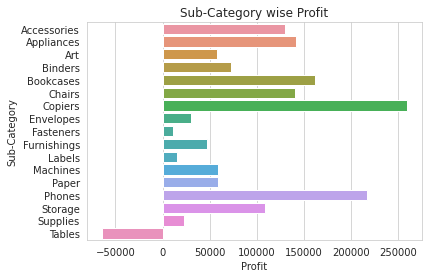

In [43]:
ax = sns.barplot(y='Sub-Category', x='Profit', data=data_summary).set(title="Sub-Category wise Profit")

### 1.5.4 : Most Profitable Country

In this section, we'll discover which country generated more sales and profit.

In [44]:
data_summary = dataset.groupby(['Country']).sum().reset_index()

The top 10 countries with the highest sales are shown below.

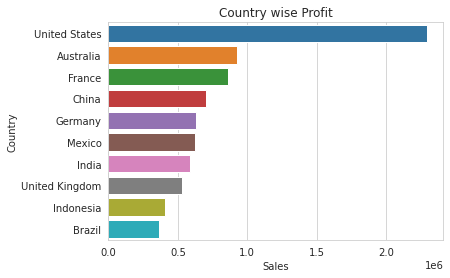

In [45]:
data_summary_temp = data_summary.sort_values('Sales', ascending=False).head(10)
ax = sns.barplot(y='Country', x='Sales', data=data_summary_temp).set(title="Country wise Profit")

The top 10 countries with the highest profit are shown below.

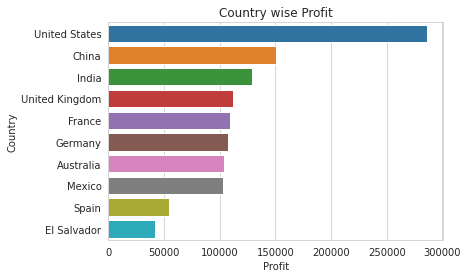

In [46]:
data_summary_temp = data_summary.sort_values('Profit', ascending=False).head(10)
ax = sns.barplot(y='Country', x='Profit', data=data_summary_temp).set(title="Country wise Profit")

### 1.5.5 : Most Profitable Region

In this section, we'll discover which region generated more sales and profit.

In [47]:
data_summary = dataset.groupby(['Region']).sum().reset_index()

The top 10 regions with the highest sales are shown below.

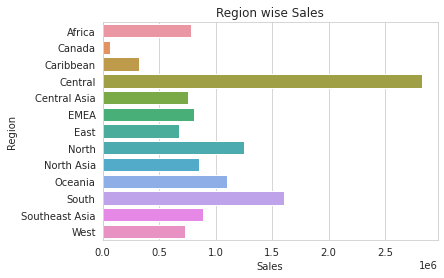

In [48]:
ax = sns.barplot(y='Region', x='Sales', data=data_summary).set(title="Region wise Sales")

The top 10 regions with the highest profit are shown below.

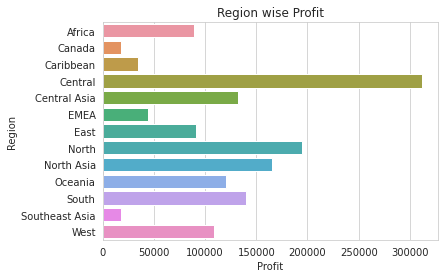

In [49]:
ax = sns.barplot(y='Region', x='Profit', data=data_summary).set(title="Region wise Profit")

### 1.5.6 : Monthly Sales

In this section, we plot line chart showing the trends of sales and profit for each month over the period of four years for given dataset.

In [50]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], infer_datetime_format=True)
dataset["Ship Date"] = pd.to_datetime(dataset["Ship Date"], infer_datetime_format=True)

In [51]:
dataset['Month_Year'] = dataset['Order Date'].dt.to_period('M')
dataset['Month_Year'] = dataset['Month_Year'].astype(str)

In [52]:
data_summary = dataset.groupby(['Month_Year']).sum().reset_index()

1. Here we plot line chart of monthly sales.

[Text(0.5, 1.0, 'Month wise Sales')]

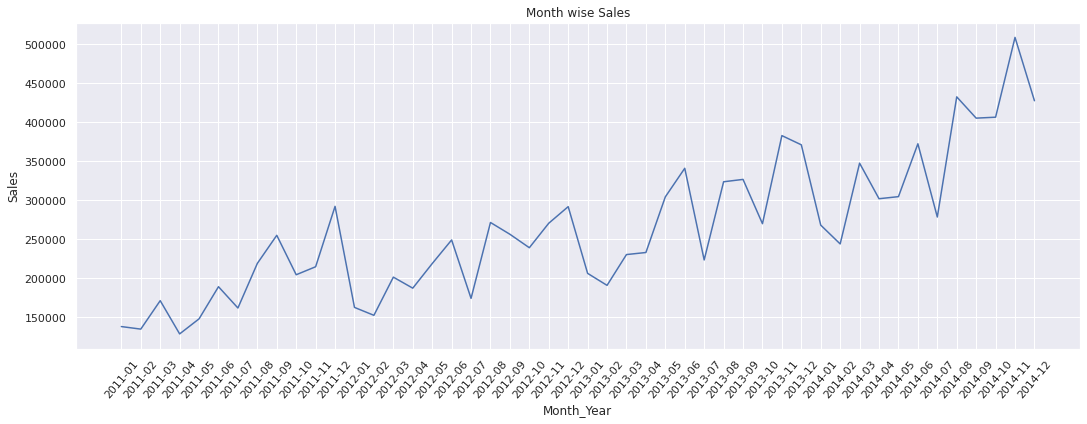

In [55]:
sns.set(rc={'figure.figsize':(18, 6)})
ax = sns.lineplot(x='Month_Year', y='Sales', data=data_summary)
ax.tick_params(axis='x', rotation=50)
ax.set(title="Month wise Sales")

2. Here we plot line chart of monthly profits.

[Text(0.5, 1.0, 'Month wise Profit')]

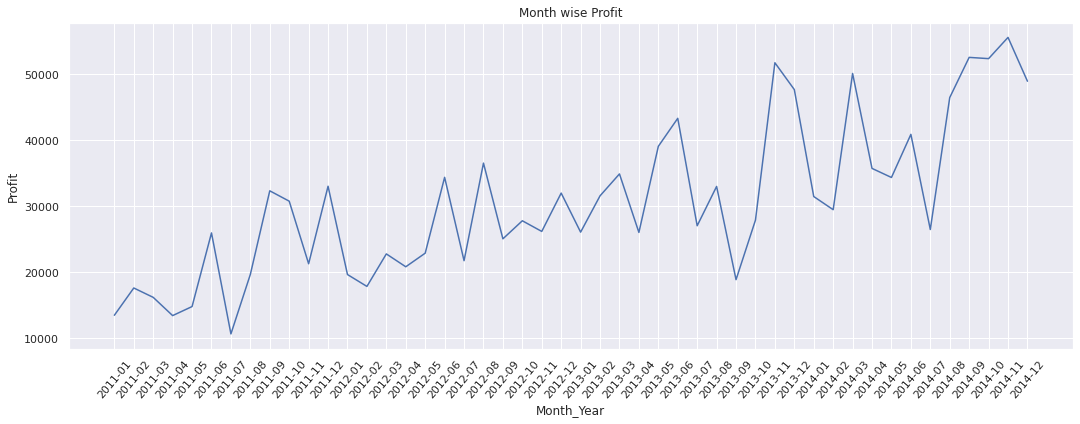

In [56]:
ax = sns.lineplot(x='Month_Year', y='Profit', data=data_summary)
ax.tick_params(axis='x', rotation=50)
ax.set(title="Month wise Profit")

# Part 2 : Modeling

## 2.1 : Base Models

In this section, we will be predicting monthly sales for last one year based on the monthly sales data we have collected for previous three years.
* We will employ very simple models such as Linear Regression, Random Forest Regressor and Ridge Regressor.
* After that, we will compare performance of each of these three models with each other.

### 2.1.1 : Preprocessing for Modeling

1. We will add new features such as "Order_Month", "Order_Year" and to decompose our "Month_Year" feature into number of numerical features. 

In [477]:
dataset_final = dataset
dataset_final['Order_Year'] = dataset['Order Date'].dt.year
dataset_final['Order_Month'] = dataset['Order Date'].dt.month

2. Aggregate dataset based on "Month_Year" column.
    * We sum features such as "Sales", "Quantity", "Profit", "Discount", and "Shipping cost".
    * We take mean of features such as "Order_Month" and "Order_Year".

In [478]:
dataset_final = dataset.groupby(['Month_Year']).agg({"Sales": np.sum, "Quantity": np.sum, "Profit": np.sum, "Discount": np.sum, "Shipping Cost": np.sum, "Order_Month": np.mean, "Order_Year": np.mean}).reset_index()

In [479]:
dataset_final['Order_Year'] = dataset_final['Order_Year'].astype(str)
dataset_final['Order_Month'] = dataset_final['Order_Month'].astype(str)

3. Now, we convert categorical features to continuous features for modeling.

In [480]:
# Convert Categorical features to continuous feature
lstFeatures = ['Order_Year', 'Order_Month']
lstFeaturesPrefix = ['order_year', 'order_month']

for featureName, featurePrefix in zip(lstFeatures, lstFeaturesPrefix):
    column_data = pd.get_dummies(dataset_final[featureName], prefix=featurePrefix)
    dataset_final = dataset_final.drop(featureName, axis=1)
    dataset_final = pd.concat((dataset_final, column_data), axis=1)

dataset_final = dataset_final.convert_dtypes()

4. Select all the numeric column for generating models.

In [481]:
lst_cont_features = dataset_final.select_dtypes("number").columns
dataset_final = dataset_final[lst_cont_features]

5. Create train and test datasets. We use data between year 2011 and 2013 as train dataset and data of year 2014 as test dataset.

In [482]:
dataset_final_y = np.array(dataset_final["Profit"])
dataset_final_X = dataset_final.drop('Profit', axis = 1)

X_train = dataset_final_X[dataset_final_X['order_year_2014.0'] != 1]
y_train = dataset_final_y[:len(X_train)]
X_test = dataset_final_X[dataset_final_X['order_year_2014.0'] == 1]
y_test = dataset_final_y[-len(X_test):]

6. Now, we normalize the feature values to achieve better generalization.

In [483]:
input_scaler = StandardScaler()
input_scaler.fit(X_train)
X_train = input_scaler.transform(X_train)
X_test = input_scaler.transform(X_test)

target_scaler = MinMaxScaler()
target_scaler.fit(y_train.reshape(-1, 1))
y_train = target_scaler.transform(y_train.reshape(-1, 1)).squeeze()
y_test = target_scaler.transform(y_test.reshape(-1, 1)).squeeze()

### 2.1.2 : Model 1 : Linear Regression

Now, we employ our first model, Linear Regression, on the  training dataset.

In [484]:
lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression()

To evaluate the performance of the Linear regression model on the test dataset, we have used "Mean Square Error" and "R2-score" evaluation metrics.

In [485]:
y_test_pred_lmodel = lModel.predict(X_test)
print(mean_squared_error(y_test, y_test_pred_lmodel))
print(r2_score(y_test, y_test_pred_lmodel))

0.056437999116693054
0.0015343585744063137


Here, we show the learning curve of Linear Regression Model.

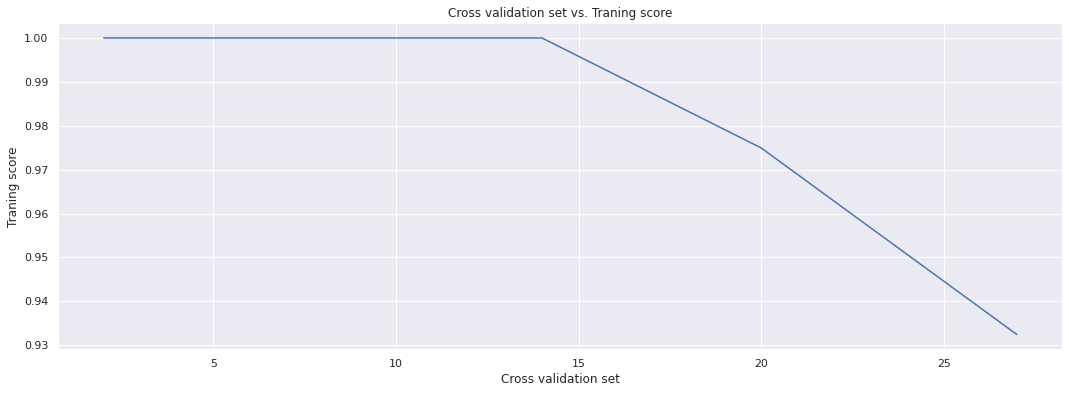

In [486]:
# Learning curves
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(lModel, X_train, y_train, cv=4, return_times=True)
plt.plot(train_sizes, np.mean(train_scores,axis=1))
plt.xlabel('Cross validation set')
plt.ylabel('Traning score')
plt.title('Cross validation set vs. Traning score')
plt.show()

### 2.1.3 : Model 2 : Ridge Regression

Now, we employ our second model, Ridge Regression, on the  training dataset.

In [487]:
rModel = Ridge(alpha=1)
rModel.fit(X_train, y_train)

Ridge(alpha=1)

To evaluate the performance of the Ridge regression model on the test dataset, we have used "Mean Square Error" and "R2-score" evaluation metrics.

In [488]:
y_test_pred_rModel = rModel.predict(X_test)
print(mean_squared_error(y_test, y_test_pred_rModel))
print(r2_score(y_test, y_test_pred_rModel))

0.05290516163650519
0.06403510090963249


Here, we show the learning curve of Ridge Regression Model.

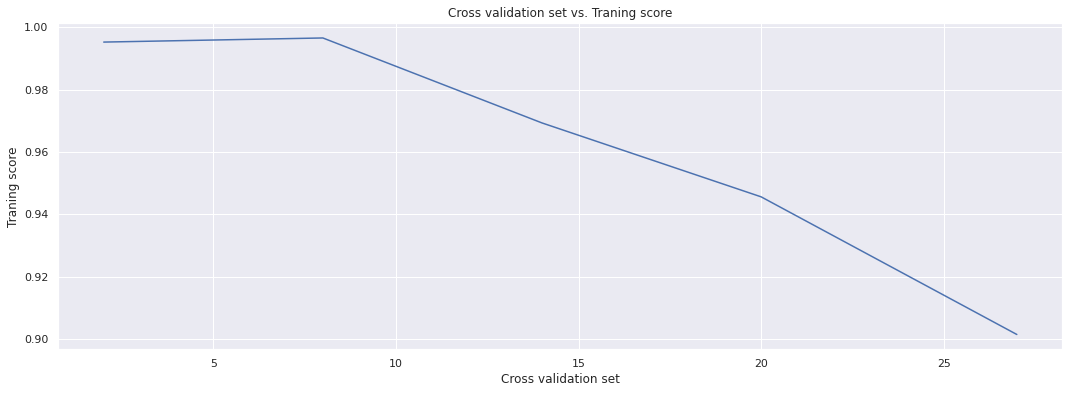

In [489]:
# Learning curves
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rModel, X_train, y_train, cv=4, return_times=True)
plt.plot(train_sizes, np.mean(train_scores,axis=1))
plt.xlabel('Cross validation set')
plt.ylabel('Traning score')
plt.title('Cross validation set vs. Traning score')
plt.show()

### 2.1.4 : Model 3 : Random Forest Regression

Now, we employ our third model, Random Forest Regression, on the training dataset.

In [490]:
rfrModel = RandomForestRegressor(n_estimators=10, random_state=42)
rfrModel.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

To evaluate the performance of the Random Forest Regression model on the test dataset, we have used "Mean Square Error" and "R2-score" evaluation metrics.

In [491]:
y_test_pred_rfrModel = rfrModel.predict(X_test)
print(mean_squared_error(y_test, y_test_pred_rfrModel))
print(r2_score(y_test, y_test_pred_rfrModel))

0.014004444875898614
0.7522421550255199


Here, we show the learning curve of Random Forest Regressor Model.

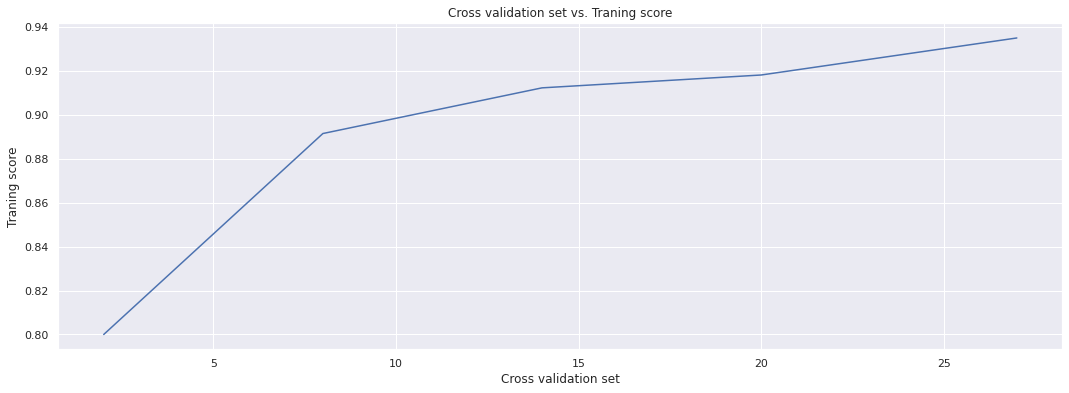

In [492]:
# Learning curves
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rfrModel, X_train, y_train, cv=4, return_times=True)
plt.plot(train_sizes, np.mean(train_scores,axis=1))
plt.xlabel('Cross validation set')
plt.ylabel('Traning score')
plt.title('Cross validation set vs. Traning score')
plt.show()

## 2.2 : SARIMA Model

A seasonal autoregressive integrated moving average (SARIMA) model is time series forecating model based on the concept of seasonal trends.

### 2.2.1 : Preprocessing for Modeling

1. First, we set "Order Date" as index of our dataset for modeling

In [493]:
dataset_final = dataset.set_index("Order Date")
dataset_final = pd.DataFrame(dataset_final['Sales'])

2. Now, we need to check whether our data is stationary or not with time. Let us perform some stationarity tests to check whether the time series is stationary or not.

In [494]:
dataset_final =  pd.DataFrame(dataset_final['Sales'].resample('D').mean())
dataset_final.fillna(0, inplace=True)
dataset_final['Sales'] = dataset_final['Sales'].astype(np.float64)
dataset_final['Sales'] = dataset_final['Sales'].interpolate(method='linear')

In [495]:
from statsmodels.tsa.stattools import adfuller 

adf = adfuller(dataset_final['Sales'].values) 
print(adf)

print('\nADF = ', str(adf[0]))
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')
for key, val in adf[4].items():
    print(key,':',val)
    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-39.389135446958576, 0.0, 0, 1460, {'1%': -3.434836872962171, '5%': -2.863521656701378, '10%': -2.567825016419591}, 17734.494652657602)

ADF =  -39.389135446958576

p-value =  0.0

Critical Values: 
1% : -3.434836872962171
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.863521656701378
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567825016419591
Null Hypothesis Rejected. Time Series is Stationary


Now we know that our data is stationary. Let us start building model for our "Sales" prediction data.

### 2.2.2 : Modeling

SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.
 * Trend Elements There are three trend elements.
 * Seasonal Elements There are four seasonal elements.

 So, now let us select these hyperparameters.

In [496]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

for parameters in pdq: 
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset_final,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:20428.578197608218
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:19731.31464319729
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:19731.31464319729
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:19063.555383943276
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

After choosing the combination of seasonal parameters with least AIC value, let us train the SARIMA model

In [497]:
mod = sm.tsa.statespace.SARIMAX(dataset_final,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) 
results = mod.fit() 
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0350      0.027     -1.294      0.196      -0.088       0.018
ma.L1         -1.0000      3.998     -0.250      0.802      -8.836       6.836
ar.S.L12       0.0040      0.025      0.157      0.875      -0.045       0.053
ma.S.L12      -1.0000      3.996     -0.250      0.802      -8.832       6.832
sigma2      1.347e+04      0.000   4.58e+07      0.000    1.35e+04    1.35e+04


Now, let us predict the value of "Sales" on the next day based on the "Sales" of previous day to evaluate the performance of the model.

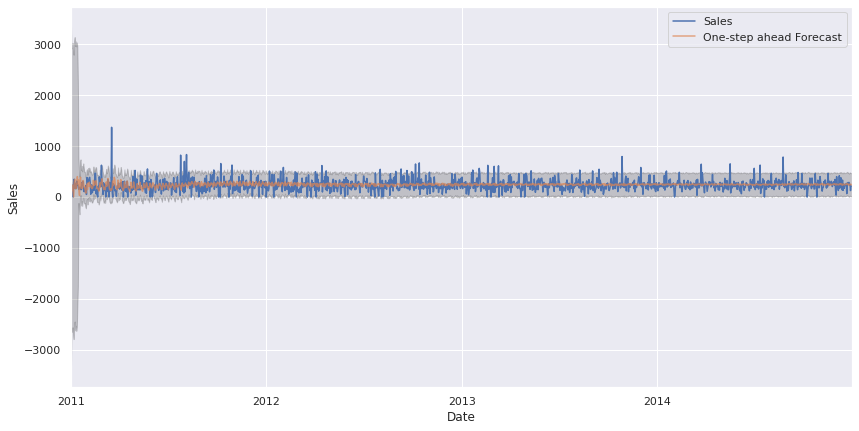

In [498]:
y_pred = results.get_prediction(start=pd.to_datetime('2011-01-01'), dynamic=False)
y_pred_val = y_pred.conf_int()

ax = dataset_final['2011':].plot(label='observed')
y_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(y_pred_val.index, y_pred_val.iloc[:, 0], y_pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

Here, we evalute model based on our evaluation metric "Root Mean Square Error".

In [499]:
y_forecasted = y_pred.predicted_mean
y_truth = dataset_final['Sales']

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Root Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) 

The Root Mean Squared Error of the forecasts is 119.54


### 2.2.3 : Sales Forecating

We predict sales for next one month (January 2015) using our SARIMA model.

In [500]:
forecast = results.forecast(steps=31)
print(forecast.astype('int'))

2015-01-01    249
2015-01-02    257
2015-01-03    258
2015-01-04    244
2015-01-05    251
2015-01-06    231
2015-01-07    248
2015-01-08    254
2015-01-09    239
2015-01-10    235
2015-01-11    245
2015-01-12    249
2015-01-13    248
2015-01-14    258
2015-01-15    259
2015-01-16    244
2015-01-17    251
2015-01-18    231
2015-01-19    249
2015-01-20    254
2015-01-21    240
2015-01-22    235
2015-01-23    245
2015-01-24    250
2015-01-25    248
2015-01-26    258
2015-01-27    259
2015-01-28    245
2015-01-29    251
2015-01-30    231
2015-01-31    249
Freq: D, dtype: int64


## 2.3 : Frequently Bought Together Products

To find frequently bought together product we use Apriori and FPGrowth methods.

### 2.3.1 : Preprocessing for Modeling

1. First we select "Order ID" and "Product Name" features from the dataset.

In [511]:
dataset_fbt = dataset[['Order ID', 'Product Name']]

### 2.3.2 : FPGrowth Algorithm

1. First of all, we convert dataset into the format on which we can apply FPGrowth algorithm.

In [512]:
dataset_fbt['Product Name'] = dataset_fbt['Product Name'].transform(lambda x: [x])
dataset_fbt = dataset_fbt.groupby(['Order ID']).sum()['Product Name'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame.sparse.from_spmatrix(encoder.fit(dataset_fbt).transform(dataset_fbt, sparse=True), columns=encoder.columns_)
display(transactions.head())

,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. We apply FPGrowth algorithm on our dataset.
    * We want product to bought together atleast three times.
    * Lift > 1.5
    * Maximum two items

In [513]:
frequent_itemsets_fpg = fpgrowth(transactions, min_support= 3/len(dataset_fbt), use_colnames=True, max_len = 2)

3. Let's now print the top 10 set of products that were purchased together. Lift > 1.5 ensures that if product 1 has been purchased, there is a strong likelihood that product 2 will also be purchased.

In [514]:
rules_fpg = association_rules(frequent_itemsets_fpg, metric='lift', min_threshold = 1.5)
display(rules_fpg.head(10))
print("Rules identified: ", len(rules_fpg))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Acco Binder, Durable)","(Stockwell Staples, Metal)",0.001638,0.001598,0.00012,0.073171,45.795732,0.000117,1.077223
1,"(Stockwell Staples, Metal)","(Acco Binder, Durable)",0.001598,0.001638,0.00012,0.075000,45.795732,0.000117,1.079311
2,"(Stockwell Staples, Metal)","(Stanley Pencil Sharpener, Water Color)",0.001598,0.002996,0.00012,0.075000,25.035000,0.000115,1.077842
3,"(Stanley Pencil Sharpener, Water Color)","(Stockwell Staples, Metal)",0.002996,0.001598,0.00012,0.040000,25.035000,0.000115,1.040002
4,"(Eldon File Cart, Single Width)","(Stanley Sketch Pad, Easy-Erase)",0.003595,0.001478,0.00012,0.033333,22.554054,0.000115,1.032954
5,"(Stanley Sketch Pad, Easy-Erase)","(Eldon File Cart, Single Width)",0.001478,0.003595,0.00012,0.081081,22.554054,0.000115,1.084323
6,"(Rogers File Cart, Single Width)","(Stanley Pencil Sharpener, Water Color)",0.003355,0.002996,0.00012,0.035714,11.921429,0.000110,1.033930
7,"(Stanley Pencil Sharpener, Water Color)","(Rogers File Cart, Single Width)",0.002996,0.003355,0.00012,0.040000,11.921429,0.000110,1.038172
8,"(Avery 3-Hole Punch, Recycled)","(Sanford Pencil Sharpener, Easy-Erase)",0.001957,0.001957,0.00012,0.061224,31.280716,0.000116,1.063132
9,"(Sanford Pencil Sharpener, Easy-Erase)","(Avery 3-Hole Punch, Recycled)",0.001957,0.001957,0.00012,0.061224,31.280716,0.000116,1.063132


Rules identified:  70


### 2.3.3 : Apriori Algorithm

1. We apply Apriori algorithm on our dataset.
    * We want product to bought together atleast three times.
    * Lift > 1.5
    * Maximum two items

In [515]:
rules = apriori(dataset_fbt, min_support=3/len(dataset_fbt), min_lift=1.5, maax_length = 2)

2. Let's now print the top 5 set of products that were purchased together. Lift > 1.5 ensures that if product 1 has been purchased, there is a strong likelihood that product 2 will also be purchased.

In [516]:
df_results = pd.DataFrame(list(rules))
rules_apr = pd.DataFrame(df_results['items'].tolist(), columns=['Product 1', 'Product 2',])
rules_apr['support'] = df_results['support']

In [517]:
rules_apr.head(5)

,Product 1,Product 2,support
0,"#10 White Business Envelopes,4 1/8 x 9 1/2",Staples,0.00012
1,"Acco Binder, Clear","Acco Binding Machine, Recycled",0.00012
2,"Acco Binder, Durable","Stockwell Staples, Metal",0.00012
3,"Tenex Trays, Blue","Acco Index Tab, Clear",0.00012
4,Adjustable Depth Letter/Legal Cart,Staples,0.00012


# References

1. Statsmodels.tsa.statespace.sarimax.SARIMAX¶. statsmodels. (n.d.). Retrieved August 1, 2022, from https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html 
2. Apyori. PyPI. (n.d.). Retrieved August 1, 2022, from https://pypi.org/project/apyori/ 
3. Raschka, S. (n.d.). Fpgrowth - mlxtend. Retrieved August 1, 2022, from http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/ 
4. Statistical Data Visualization¶. seaborn. (n.d.). Retrieved August 1, 2022, from https://seaborn.pydata.org/ 